Disciplina: MAC0460 - Introdução ao Aprendizado de Máquina

Aluno: Rafael Rodrigues - NUSP 10273988


In [524]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [525]:
# Define columns to be used
columns = ["type1", "against_electric", "attack", "defense", "sp_attack", "sp_defense", "speed", "hp", "weight_kg",
           "height_m", "base_total", "base_egg_steps", "base_happiness", "capture_rate", "experience_growth", "percentage_male"]

# Read data from csv
df = pd.read_csv("pokemon.csv", usecols=columns)

# Drop rows with missing values, and unnecessary classes
df = df.dropna()
df = df[df.type1.isin(['water', 'normal'])]

df.head()


,against_electric,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,weight_kg
6,2.0,48,5120,70,314,45,65,1059860,0.5,44,88.1,50,64,43,water,9.0
7,2.0,63,5120,70,405,45,80,1059860,1.0,59,88.1,65,80,58,water,22.5
8,2.0,103,5120,70,630,45,120,1059860,1.6,79,88.1,135,115,78,water,85.5
15,2.0,45,3840,70,251,255,40,1059860,0.3,40,50.0,35,35,56,normal,1.8
16,2.0,60,3840,70,349,120,55,1059860,1.1,63,50.0,50,50,71,normal,30.0


In [526]:
# Transform wanted classes into a binary variable
df["type1"] = df["type1"].replace("water", 1)
df["type1"] = df["type1"].replace("normal", 0)

# Convert to numeric values
df = df.apply(pd.to_numeric)

# Normalize data
df = (df - df.min()) / (df.max() - df.min())

# Remove outliers: rows with a z-score greater than 3
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Transform wanted classes back to their original values
df["type1"] = df["type1"].replace(1, "water")
df["type1"] = df["type1"].replace(0, "normal")


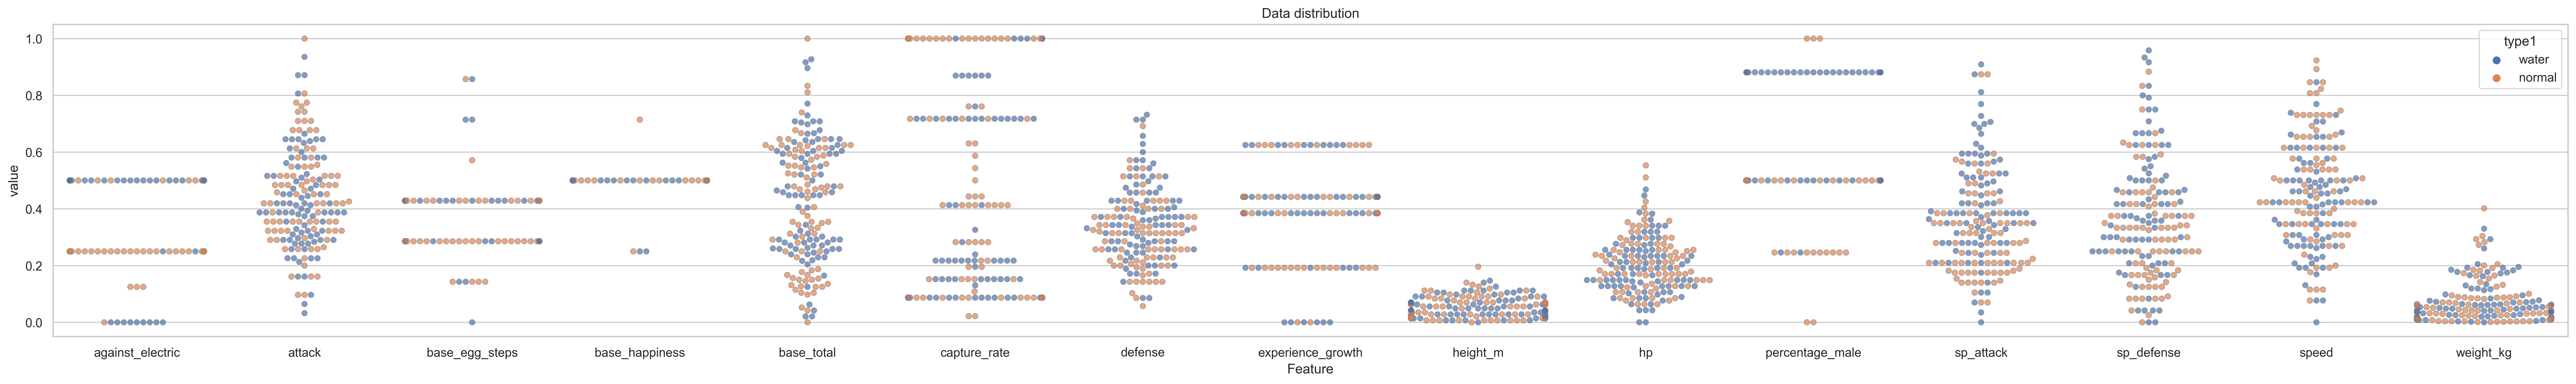

In [527]:
# Plot vertically-oriented swarms of points for each feature
df_melt = pd.melt(df, "type1", var_name="Feature")

plt.figure(figsize=(40, 5), dpi=300)
plt.title("Data distribution")
sns.swarmplot(x="Feature", y="value", hue="type1",
              edgecolor="grey", alpha=.7, linewidth=.5, data=df_melt)
plt.savefig("swarmplot.png")


In [528]:
# Due to the presence of multiple points sharing the same value, a significant portion of them overlap in the visualization. While Swarmplot addresses this issue by spreading out the points, an alternative option is Stripplot. However, it should be noted that Stripplot, despite handling overlapping points, may present a more challenging visualization.
# sns.stripplot(x="Feature", y="value", hue="type1", alpha=0.5, data=df_melt)


In [534]:
# Split data into X and y
X = df.drop("type1", axis=1)
y = df["type1"]

# Split data into train, test and validation sets
X_, X_validation, y_, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X_, y_, test_size=0.2, random_state=42)


In [530]:
# Define classifiers to be used
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier(),
    GaussianNB(),
]

# Define classifiers names
names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVC (SVM)",
    "Nearest Neighbors",
    "MLPClassifier (Neural Net)",
    "GaussianNB (Naive Bayes)",
]


Define parameters to be tested for each classifier

- LogisticRegression: Penalty is the norm used in the penalization. C is the inverse of regularization strength.

- DecisionTree: Criterion is the function to measure the quality of a split. Max_depth is the maximum depth of the tree. Min_samples_leaf is the minimum number of samples required to be at a leaf node.

- RandomForest: N_estimators is the number of trees in the forest. Max_depth is the maximum depth of the tree. Min_samples_leaf is the minimum number of samples required to be at a leaf node.

- SVC: Kernel is the kernel type to be used in the algorithm. C is the penalty parameter of the error term. Degree is the degree of the polynomial kernel function.

- KNeighborsClassifier: N_neighbors is the number of neighbors to use by default for kneighbors queries.

- MLPClassifier: Hidden_layer_sizes is the ith element represents the number of neurons in the ith hidden layer. Activation is the activation function for the hidden layer. Solver is the solver for weight optimization. Alpha is the L2 penalty (regularization term) parameter.

- GaussianNB: Var_smoothing is the portion of the largest variance of all features that is added to variances for calculation stability.


In [537]:
logreg_params = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': [
        'liblinear', 'saga'], 'max_iter': [1000]},
]
decisiontree_params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': [
        2, 4, 6, 8, 10,], 'min_samples_leaf': [1, 2, 3, 4, 5,]},
]
randomforest_params = [
    {'n_estimators': [10, 100, 1000], 'max_depth': [
        2, 4, 6, 8, 10,], 'min_samples_leaf': [1, 2, 3, 4, 5,], }
]
svm_params = [
    {'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4, 5, 6,]},
]
knn_params = [
    {'n_neighbors': [1, 2, 3, 4, 5,], 'weights': ['uniform', 'distance']},
]
mlp_params = [
    {'hidden_layer_sizes': [(10,), (50,), (100,)], 'activation': [
        'identity', 'logistic', 'tanh'], 'solver': ['lbfgs', 'sgd', 'adam']},
]
naivebayes_params = [
    {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
]

# Aggregate all parameters in a list
params = [
    logreg_params,
    decisiontree_params,
    randomforest_params,
    svm_params,
    knn_params,
    mlp_params,
    naivebayes_params,
]


In [539]:
# Iterate over classifiers, training and testing them, using GridSearchCV to find the best parameters for each one
for name, clf in zip(names, classifiers):
    if name == "Random Forest":
        continue
    print(name)
    clf = GridSearchCV(clf, params[names.index(name)], cv=5)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set: ", clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print("Grid scores on development set: Mean = %0.3f, Standard deviation = %0.3f" % (means.mean(), stds.mean()))

    y_true, y_pred = y_test, clf.predict(X_test)
    print("Test set result: Accuracy = %0.3f" % accuracy_score(y_true, y_pred))

    y_true, y_pred = y_validation, clf.predict(X_validation)
    print("Validation set result: Accuracy = %0.3f" %
          accuracy_score(y_true, y_pred))
    print("")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=["normal", "water"])
    plt.figure(figsize=(5, 5), dpi=300)
    plt.title("Confusion Matrix for " + name)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={
                "size": 20}, xticklabels=["normal", "water"], yticklabels=["normal", "water"])
    plt.savefig("confusion_matrix_" + name + ".png")
    plt.clf()
    plt.close()


Logistic Regression
Best parameters set found on development set: %s {'C': 10, 'max_iter': 1000, 'solver': 'saga'}
Grid scores on development set: Mean = 0.665, Standard deviation = 0.061
Test set result: Accuracy = 0.750
Validation set result: Accuracy = 0.743

Decision Tree
Best parameters set found on development set: %s {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
Grid scores on development set: Mean = 0.769, Standard deviation = 0.063
Test set result: Accuracy = 0.893
Validation set result: Accuracy = 0.829

SVC (SVM)
Best parameters set found on development set: %s {'C': 10, 'degree': 3, 'kernel': 'poly'}
Grid scores on development set: Mean = 0.637, Standard deviation = 0.039
Test set result: Accuracy = 0.643
Validation set result: Accuracy = 0.714

Nearest Neighbors
Best parameters set found on development set: %s {'n_neighbors': 4, 'weights': 'uniform'}
Grid scores on development set: Mean = 0.727, Standard deviation = 0.108
Test set result: Accuracy = 0.857
Va